### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [89]:
data = pd.read_csv('data/coupons.csv')

In [90]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

In [92]:
#Lets check for missing values in each column like isnull and isna 
missing_values=data.isnull().sum()
print("Missing values in each column:")
print(missing_values)
total_missing = data.isnull().sum().sum()
print(f"\nTotal missing values in the dataset: {total_missing}")

Missing values in each column:
destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

Total missing values in the dataset: 13370


In [42]:
#Lets find the potential anomalies like outliers and unexpected ranges to find the summary statistics categorically
print(data.describe(include='all')) 

            destination passanger weather   temperature   time        coupon  \
count             12684     12684   12684  12684.000000  12684         12684   
unique                3         4       3           NaN      5             5   
top     No Urgent Place     Alone   Sunny           NaN    6PM  Coffee House   
freq               6283      7305   10069           NaN   3230          3996   
mean                NaN       NaN     NaN     63.301798    NaN           NaN   
std                 NaN       NaN     NaN     19.154486    NaN           NaN   
min                 NaN       NaN     NaN     30.000000    NaN           NaN   
25%                 NaN       NaN     NaN     55.000000    NaN           NaN   
50%                 NaN       NaN     NaN     80.000000    NaN           NaN   
75%                 NaN       NaN     NaN     80.000000    NaN           NaN   
max                 NaN       NaN     NaN     80.000000    NaN           NaN   

       expiration  gender    age    mar

<Figure size 1000x600 with 0 Axes>

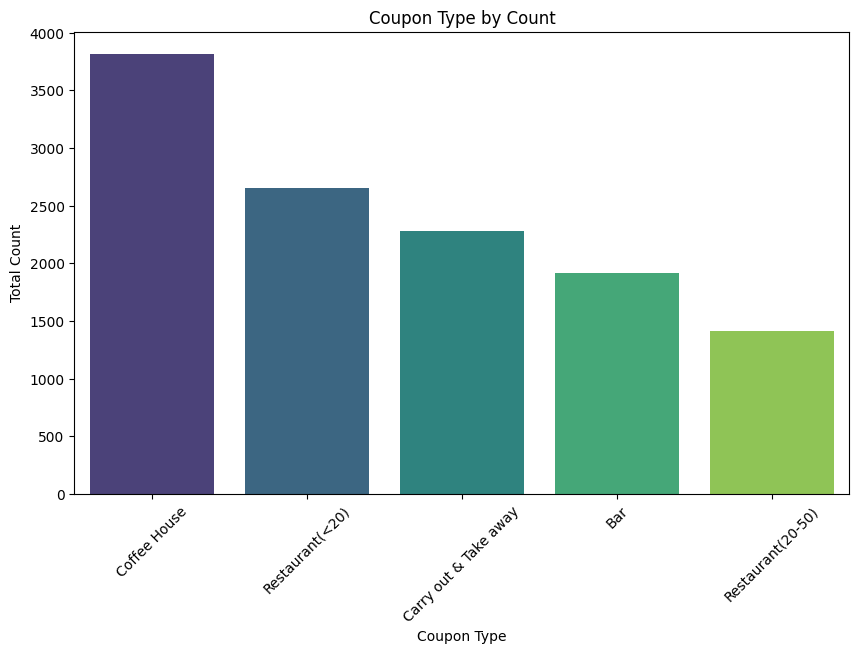

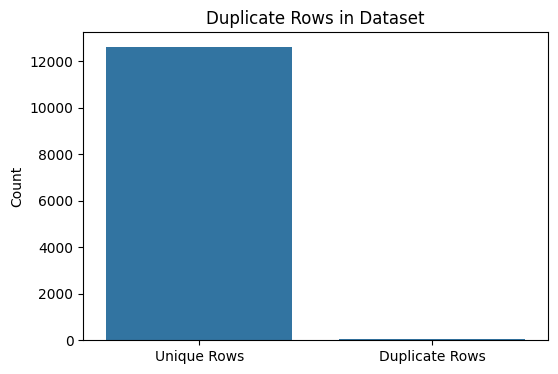


Total duplicates values in the dataset: 74


In [93]:
#Lets check the duplicate rows 

duplicate_rows = data.duplicated()

# Count the total number of duplicates
total_duplicates = duplicate_rows.sum()

# Visualize duplicates in the dataset
plt.figure(figsize=(6, 4))
sns.barplot(x=["Unique Rows", "Duplicate Rows"], y=[len(data) - total_duplicates, total_duplicates])
plt.title("Duplicate Rows in Dataset")
plt.ylabel("Count")
plt.show()

print(f"\nTotal duplicates values in the dataset: {total_duplicates}")

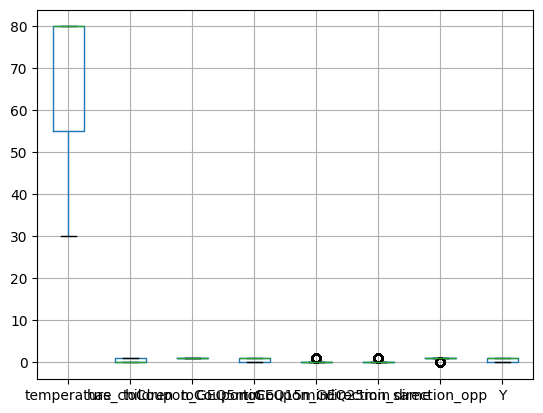

In [94]:
#Lets check the outlier using boxplots for numerical columns
data.select_dtypes(include='number').boxplot()
plt.show()

In [23]:
#lets check for invalid or unexpected Values , list unique values and check for inconsistencies
for col in data.select_dtypes(include='object').columns:
    print(f"\nUnique values in '{col}': {data[col].unique()}")


Unique values in 'destination': ['No Urgent Place' 'Home' 'Work']

Unique values in 'passanger': ['Alone' 'Friend(s)' 'Kid(s)' 'Partner']

Unique values in 'weather': ['Sunny' 'Rainy' 'Snowy']

Unique values in 'time': ['2PM' '10AM' '6PM' '7AM' '10PM']

Unique values in 'coupon': ['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']

Unique values in 'expiration': ['1d' '2h']

Unique values in 'gender': ['Female' 'Male']

Unique values in 'age': ['21' '46' '26' '31' '41' '50plus' '36' 'below21']

Unique values in 'maritalStatus': ['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']

Unique values in 'education': ['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']

Unique values in 'occupation': ['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' '

In [45]:
#lets check for unusual number of zero values 
zero_counts = (data == 0).sum()
print("\nZero values in each column:")
print(zero_counts)


Zero values in each column:
destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children             7431
education                   0
occupation                  0
income                      0
car                         0
Bar                         0
CoffeeHouse                 0
CarryAway                   0
RestaurantLessThan20        0
Restaurant20To50            0
toCoupon_GEQ5min            0
toCoupon_GEQ15min        5562
toCoupon_GEQ25min       11173
direction_same           9960
direction_opp            2724
Y                        5474
dtype: int64


In [95]:
#Lets visualize the missing data

missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_percentage)
plt.xticks(rotation=90)
plt.ylabel("Percentage of Missing Data")
plt.title("Missing Data Analysis")
plt.show

missing_values.sort_values(ascending=False), missing_percentage.sort_values(ascending=False)



(car                     12576
 CoffeeHouse               217
 Restaurant20To50          189
 CarryAway                 151
 RestaurantLessThan20      130
 Bar                       107
 destination                 0
 passanger                   0
 direction_opp               0
 direction_same              0
 toCoupon_GEQ25min           0
 toCoupon_GEQ15min           0
 toCoupon_GEQ5min            0
 income                      0
 occupation                  0
 education                   0
 has_children                0
 maritalStatus               0
 age                         0
 gender                      0
 expiration                  0
 coupon                      0
 time                        0
 temperature                 0
 weather                     0
 Y                           0
 dtype: int64,
 car                     99.148534
 CoffeeHouse              1.710817
 Restaurant20To50         1.490066
 CarryAway                1.190476
 RestaurantLessThan20     1.024913
 Bar

3. Decide what to do about your missing data -- drop, replace, other...

In [51]:


#create a new data frame
df=data
#Drop the column with high missing data in this case it is car
df=df.drop(columns=['car'])


In [53]:
# Drop the remaining negligible count of null values

df = df.dropna()

In [57]:
# Lets check the 'total' null value count in df, again and make sure the missing values should be zero

missing_values=df.isnull().sum()
print("Missing values in each column:")
print(missing_values)
total_missing = df.isnull().sum().sum()
print(f"\nTotal missing values in the dataset: {total_missing}")

Missing values in each column:
destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

Total missing values in the dataset: 0


4. What proportion of the total observations chose to accept the coupon?



In [97]:
# Calculate the proportion of observations whether the coupon was accepted (1 = Yes, 0 = No)

total_coupon_offered = len(df)
total_accepted_coupons = df['Y'].sum()
coupon_accepted = round((total_accepted_coupons/total_coupon_offered)*100,2)

print(f"\nCoupon accepted: {coupon_accepted}")


Coupon accepted: 56.93


5. Use a bar plot to visualize the `coupon` column.

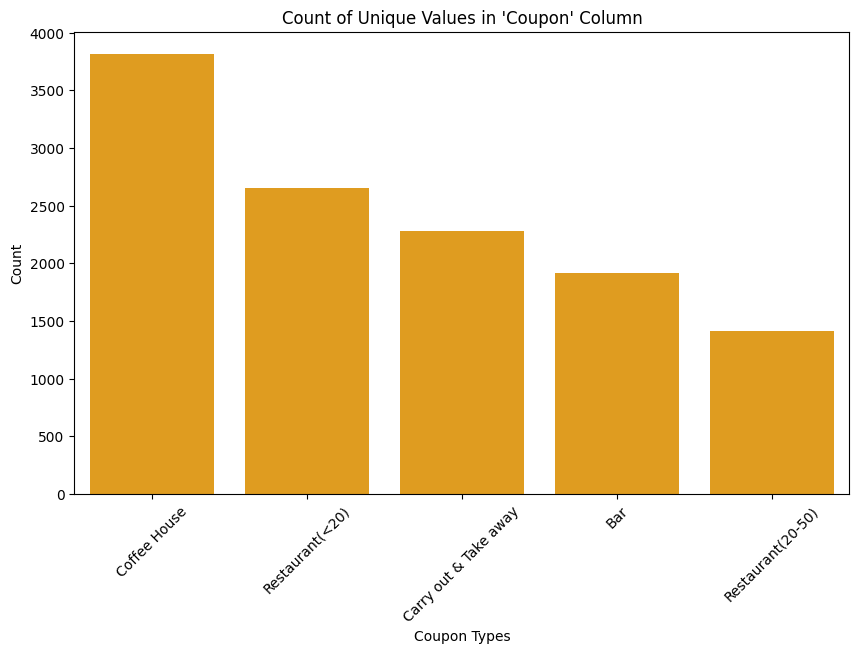

In [107]:
# Below bar plot shows the coupon column with all its unique values with count
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='coupon', order=df['coupon'].value_counts().index,color='orange')
plt.title("Count of Unique Values in 'Coupon' Column")
plt.xlabel("Coupon Types")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

6. Use a histogram to visualize the temperature column.

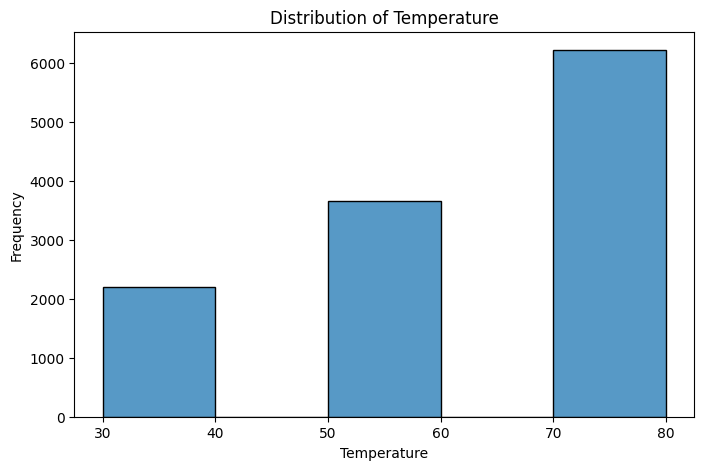

In [110]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='temperature', binwidth=10)
plt.title("Distribution of Temperature")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [111]:
# check for unique values of 'coupon' column 

df['coupon'].unique()

array(['Restaurant(<20)', 'Coffee House', 'Bar', 'Carry out & Take away',
       'Restaurant(20-50)'], dtype=object)

In [120]:
#create a new dataframe for Bar coupon only
df_bar_coupons = df.query("coupon == 'Bar'")

In [121]:
# verify if coupons are filtered by 'Bar'
df_bar_coupons.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0


2. What proportion of bar coupons were accepted?


In [122]:
# Lets first calculate the bar coupon accepted count

bar_coupon_offered = len(df_bar_coupons)
total_bar_accepted_coupons = df_bar_coupons['Y'].sum()
bar_coupon_accepted = round((total_bar_accepted_coupons/bar_coupon_offered)*100,2)

print(f"\nBar Coupon accepted: {bar_coupon_accepted}")


Bar Coupon accepted: 41.19


In [127]:
# Lets first calculate the bar coupon not accepted count

bar_coupon_not_accepted = df_bar_coupons[(df_bar_coupons['coupon'] == 'Bar') & (df_bar_coupons['Y'] == 0)]

# Count the number of such rows
not_accepted_count = len(bar_coupon_not_accepted)
total_bar_coupon_offered = df_bar_coupons['Y'].count()
bar_coupon_not_accepted = round((not_accepted_count/total_bar_coupon_offered)*100,2)
print(f"\nBar Coupon Not accepted: {bar_coupon_not_accepted}")
print("Count of 'Bar' coupons not accepted:", not_accepted_count)


Bar Coupon Not accepted: 58.81
Count of 'Bar' coupons not accepted: 1125


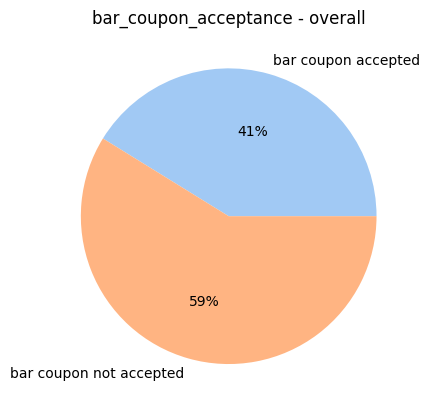

In [128]:
#define data
data = [bar_coupon_accepted, bar_coupon_not_accepted]
labels = ['bar coupon accepted', 'bar coupon not accepted']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:2]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('bar_coupon_acceptance - overall')
plt.show()

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [129]:
# check for all the unique values for the Bar column

df_bar_coupons['Bar'].unique()

array(['never', 'less1', '1~3', 'gt8', '4~8'], dtype=object)

In [140]:
more_frequent = ['gt8', '4~8']

# Now, use the list and create a new column with condition based

df_bar_coupons['Bar_More_Frequent'] = np.where(df_bar_coupons['Bar'].isin(['gt8', '4~8']), 1, 0)

# Now, validate where the new column is present and the value counts are as expected

most_frequent_bar_visitor=df_bar_coupons['Bar_More_Frequent'].value_counts()

print(most_frequent_bar_visitor)

# Total who went to bar frequently = 193
# Total who did not go to bar frequently = 1720
# This column now simply says whether a person is a frequent visitor to the bar or not

Bar_More_Frequent
0    1720
1     193
Name: count, dtype: int64


In [143]:
# Check for the bar coupon accepted count for frequent visitors

bar_coupon_accepted_more_frequent_visitors = df_bar_coupons.query("Bar_More_Frequent == 1")['Y'].value_counts()[1]

# verify total bar coupon offered count for frequent visitors

total_bar_coupon_offered_frequent_visitors = df_bar_coupons.query("Bar_More_Frequent == 1")['Y'].count()

# find the proportion of bar coupon acceptance for frequent visitors

proportion_of_bar_coupon_acceptance_frequent_visitors = round((bar_coupon_accepted_more_frequent_visitors/total_bar_coupon_offered_frequent_visitors)*100,2)

print(f"\nProportion of bar coupon acceptance for more frequent visitor: {proportion_of_bar_coupon_acceptance_frequent_visitors}")


Proportion of bar coupon acceptance: 76.17


In [144]:
# Check for the bar coupon accepted count for less frequent visitors

bar_coupon_accepted_less_frequent_visitors = df_bar_coupons.query("Bar_More_Frequent == 0")['Y'].value_counts()[1]

# verify total bar coupon offered count for less frequent visitors

total_bar_coupon_offered_less_frequent_visitors = df_bar_coupons.query("Bar_More_Frequent == 0")['Y'].count()

# find the proportion of bar coupon acceptance  for less frequent visitors

proportion_of_bar_coupon_acceptance_less_frequent_visitors = round((bar_coupon_accepted_less_frequent_visitors/total_bar_coupon_offered_less_frequent_visitors)*100,2)

print(f"\nProportion of bar coupon acceptance for less frequent visitor: {proportion_of_bar_coupon_acceptance_less_frequent_visitors}")


Proportion of bar coupon acceptance for less frequent visitor: 37.27


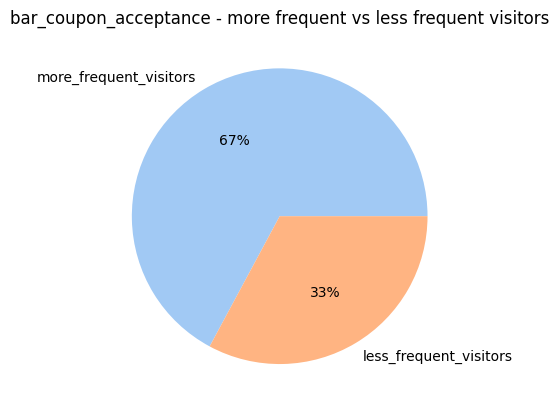

In [146]:
#define data
data = [proportion_of_bar_coupon_acceptance_frequent_visitors, proportion_of_bar_coupon_acceptance_less_frequent_visitors]
labels = ['more_frequent_visitors', 'less_frequent_visitors']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:2]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('bar_coupon_acceptance - more frequent vs less frequent visitors')
plt.show()

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [154]:
# Let's create a function that checks for both the conditions and return 1 or 0

def conditions(s):
    if s['Bar'] in ['1~3', 'gt8', '4~8'] and s['age'] in ['46', '26', '31', '41', '50plus', '36']:
        return 1
    else:
        return 0
    
# Let's create a new column based on the function above

df_bar_coupons['Bar_Frequent_Age'] = df_bar_coupons.apply(conditions, axis=1)

In [155]:
# Let's validate the outcome whether it works based on the conditions applied

df_bar_coupons[['Bar','age','Bar_Frequent_Age']].sample(10)

,Bar,age,Bar_Frequent_Age
6839,never,26,0
11577,never,36,0
4335,1~3,31,1
12460,never,41,0
3101,never,26,0
1496,never,50plus,0
926,1~3,31,1
6451,less1,26,0
796,less1,46,0
3637,4~8,21,0


In [156]:
# Calculate the bar coupon accepted count for high frequent vistors with elderly age

bar_coupon_accepted_more_frequent_visitors_elder_age = df_bar_coupons.query("Bar_Frequent_Age == 1")['Y'].value_counts()[1]

# Verify the total bar coupon offered count for frequent visitors with elderly age

total_bar_coupon_offered_frequent_visitors_elder_age = df_bar_coupons.query("Bar_Frequent_Age == 1")['Y'].count()

# validate the proportion of bar coupon acceptance for frequent visitors with elderly age

proportion_of_bar_coupon_acceptance_frequent_visitors_elderly_age = round((bar_coupon_accepted_more_frequent_visitors_elder_age/total_bar_coupon_offered_frequent_visitors_elder_age)*100,2)

print(f"\nProportion of bar coupon acceptance for high frequent visitor with elderly age: {proportion_of_bar_coupon_acceptance_frequent_visitors_elderly_age}")



Proportion of bar coupon acceptance for high frequent visitor with elderly age: 68.98


In [158]:
# Calculate the bar coupon accepted count for less frequent vistors with younger age

bar_coupon_accepted_less_frequent_visitors_younger_age = df_bar_coupons.query("Bar_Frequent_Age == 0")['Y'].value_counts()[1]

# Verify the total bar coupon offered count for less frequent vistors with younger age

total_bar_coupon_offered_less_frequent_visitors_younger_age = df_bar_coupons.query("Bar_Frequent_Age == 0")['Y'].count()

# validate the proportion of bar coupon acceptance for for less frequent vistors with younger age

proportion_of_bar_coupon_acceptance_less_frequent_visitors_younger_age = round((bar_coupon_accepted_less_frequent_visitors_younger_age/total_bar_coupon_offered_less_frequent_visitors_younger_age)*100,2)



print(f"\nProportion of bar coupon acceptance for less frequent visitor with younger age: {proportion_of_bar_coupon_acceptance_less_frequent_visitors_younger_age}")



Proportion of bar coupon acceptance for less frequent visitor with younger age: 33.77


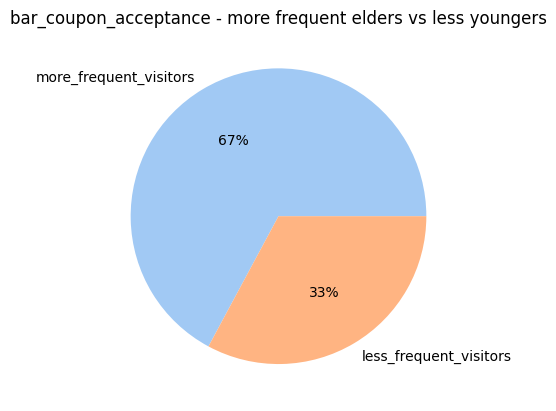

In [159]:

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:2]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('bar_coupon_acceptance - more frequent elders vs less frequent youngers')
plt.show()

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [161]:
df_bar_coupons['age'].unique()


array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

In [162]:
df_bar_coupons['occupation'].unique()

array(['Architecture & Engineering', 'Student',
       'Education&Training&Library', 'Unemployed', 'Healthcare Support',
       'Healthcare Practitioners & Technical', 'Sales & Related',
       'Management', 'Arts Design Entertainment Sports & Media',
       'Computer & Mathematical', 'Life Physical Social Science',
       'Personal Care & Service', 'Office & Administrative Support',
       'Construction & Extraction', 'Legal', 'Retired',
       'Community & Social Services', 'Installation Maintenance & Repair',
       'Transportation & Material Moving', 'Business & Financial',
       'Protective Service', 'Food Preparation & Serving Related',
       'Production Occupations',
       'Building & Grounds Cleaning & Maintenance',
       'Farming Fishing & Forestry'], dtype=object)

In [163]:
# A function that checks for all 3 conditions and return 1 or 0

def conditions(s):
    if s['Bar'] in ['1~3', 'gt8', '4~8'] and s['age'] in ['21','46', '26', '31', '41', '50plus', '36'] and s['occupation'] not in ['Farming Fishing & Forestry']:
        return 1
    else:
        return 0
    
# add a new column based on the function above

df_bar_coupons['Bar_Frequent_Age_Job'] = df_bar_coupons.apply(conditions, axis=1)

In [164]:
df_bar_coupons[['Bar','age','occupation','Bar_Frequent_Age_Job']].sample(10)

,Bar,age,occupation,Bar_Frequent_Age_Job
9092,less1,26,Sales & Related,0
10261,never,31,Student,0
8902,less1,26,Management,0
11567,1~3,31,Healthcare Practitioners & Technical,1
10766,less1,31,Computer & Mathematical,0
11955,less1,50plus,Education&Training&Library,0
755,1~3,50plus,Healthcare Support,1
11799,less1,41,Unemployed,0
10683,never,26,Unemployed,0
9978,never,21,Office & Administrative Support,0


In [165]:
# caluclate the bar coupon accepted count for high frequent vistors with elderly age and not farming/fishing job

bar_coupon_accepted_more_frequent_visitors_elder_age_job = df_bar_coupons.query("Bar_Frequent_Age_Job == 1")['Y'].value_counts()[1]

# check the total bar coupon offered count for frequent visitors with elderly age and not farming/fishing job

total_bar_coupon_offered_frequent_visitors_elder_age_job = df_bar_coupons.query("Bar_Frequent_Age_Job == 1")['Y'].count()

# validate the proportion of bar coupon acceptance from above values for frequent visitors with elderly age and not farming/fishing job

proportion_of_bar_coupon_acceptance_frequent_visitors_elderly_age_job = round((bar_coupon_accepted_more_frequent_visitors_elder_age_job/total_bar_coupon_offered_frequent_visitors_elder_age_job)*100,2)

print(f"\nProportion of bar coupon acceptance for high frequent visitor with elder age, not farming/fishing job: {proportion_of_bar_coupon_acceptance_frequent_visitors_elderly_age_job}")




Proportion of bar coupon acceptance for high frequent visitor with elder age, not farming/fishing job: 69.04


In [166]:
# calculate the bar coupon accepted count for less frequent vistors with younger age and specific job

bar_coupon_accepted_less_frequent_visitors_younger_age_job = df_bar_coupons.query("Bar_Frequent_Age_Job == 0")['Y'].value_counts()[1]

# check the total bar coupon offered count for less frequent vistors with younger age and specific job

total_bar_coupon_offered_less_frequent_visitors_younger_age_job = df_bar_coupons.query("Bar_Frequent_Age_Job == 0")['Y'].count()

# validate the proportion of bar coupon acceptance from above values for less frequent vistors with younger age and specific job

proportion_of_bar_coupon_acceptance_less_frequent_visitors_younger_age_job = round((bar_coupon_accepted_less_frequent_visitors_younger_age_job/total_bar_coupon_offered_less_frequent_visitors_younger_age_job)*100,2)
print(f"\nProportion of bar coupon acceptance for high frequent visitor with younger age and specific job: {proportion_of_bar_coupon_acceptance_less_frequent_visitors_younger_age_job}")



Proportion of bar coupon acceptance for high frequent visitor with younger age and specific job: 29.61


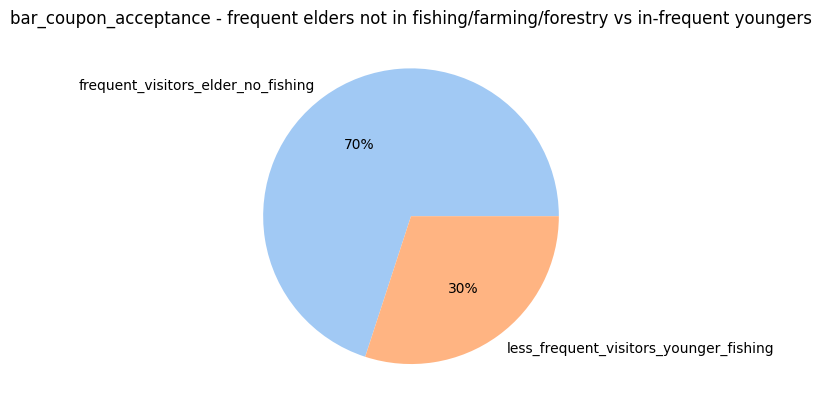

In [167]:
#define data
data = [proportion_of_bar_coupon_acceptance_frequent_visitors_elderly_age_job, proportion_of_bar_coupon_acceptance_less_frequent_visitors_younger_age_job]
labels = ['frequent_visitors_elder_no_fishing', 'less_frequent_visitors_younger_fishing']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:2]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('bar_coupon_acceptance - frequent elders not in fishing/farming/forestry vs in-frequent youngers')
plt.show()

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [168]:
df_bar_coupons['maritalStatus'].unique()

array(['Single', 'Married partner', 'Unmarried partner', 'Divorced',
       'Widowed'], dtype=object)

In [169]:
# A function that checks for all first 3 conditions and return 1 or 0

def conditions(s):
    if s['Bar'] in ['1~3', 'gt8', '4~8'] and s['age'] in ['21','46', '26', '31', '41', '50plus', '36'] and s['maritalStatus'] not in ['Widowed']:
        return 1
    else:
        return 0
    
# add a new column based on the function above

df_bar_coupons['Bar_Frequent_Age_Marital'] = df_bar_coupons.apply(conditions, axis=1)

In [170]:
df_bar_coupons[['Bar','age','maritalStatus','Bar_Frequent_Age_Marital']].sample(10)

,Bar,age,maritalStatus,Bar_Frequent_Age_Marital
9286,less1,26,Unmarried partner,0
3993,less1,36,Single,0
1426,less1,36,Married partner,0
10852,1~3,41,Single,1
10951,never,31,Married partner,0
3072,gt8,26,Single,1
1536,never,36,Married partner,0
9844,1~3,50plus,Married partner,1
3725,never,50plus,Single,0
9804,never,46,Married partner,0


In [171]:
# calculate the bar coupon accepted count for high frequent vistors with elderly age and not widowed

bar_coupon_accepted_more_frequent_visitors_elder_age_not_widowed = df_bar_coupons.query("Bar_Frequent_Age_Marital == 1")['Y'].value_counts()[1]

# check the total bar coupon offered count for frequent visitors with elderly age and not widowed

total_bar_coupon_offered_frequent_visitors_elder_age_not_widowed = df_bar_coupons.query("Bar_Frequent_Age_Marital == 1")['Y'].count()

# validate the proportion of bar coupon acceptance for frequent visitors with elderly age and not widowed

proportion_of_bar_coupon_acceptance_frequent_visitors_elderly_age_not_widowed = round((bar_coupon_accepted_more_frequent_visitors_elder_age_not_widowed/total_bar_coupon_offered_frequent_visitors_elder_age_not_widowed)*100,2)


print(f"\nProportion of bar coupon acceptance for high frequent elderly vistor and not widowed: {proportion_of_bar_coupon_acceptance_frequent_visitors_elderly_age_not_widowed}")



Proportion of bar coupon acceptance for high frequent elderly vistor and not widowed: 69.04


In [172]:
# Let's create a function that checks for all second 2 conditions and return 1 or 0

def conditions(s):
    if s['Bar'] in ['1~3', 'gt8', '4~8'] and s['age'] in ['below21', '21', '26']:
        return 1
    else:
        return 0
    
# Let's create a new column based on the function above

df_bar_coupons['Bar_Frequent_Age_30'] = df_bar_coupons.apply(conditions, axis=1)

In [173]:
# Let's validate the outcome whether it works based on the conditions applied

df_bar_coupons[['Bar','age','Bar_Frequent_Age_30']].sample(10)

,Bar,age,Bar_Frequent_Age_30
1043,never,50plus,0
9942,less1,21,0
8511,less1,46,0
11195,less1,26,0
10298,never,31,0
10407,less1,26,0
12460,never,41,0
9256,1~3,26,1
3307,never,21,0
9970,never,21,0


In [174]:
# calculate the bar coupon accepted count for high frequent vistors with younger age

bar_coupon_accepted_more_frequent_visitors_younger_age = df_bar_coupons.query("Bar_Frequent_Age_30 == 1")['Y'].value_counts()[1]

# check the total bar coupon offered count for frequent visitors with younger age

total_bar_coupon_offered_frequent_visitors_younger_age = df_bar_coupons.query("Bar_Frequent_Age_30 == 1")['Y'].count()

# validate the proportion of bar coupon acceptance from above values for frequent visitors with younger age

proportion_of_bar_coupon_acceptance_frequent_visitors_younger_age = round((bar_coupon_accepted_more_frequent_visitors_younger_age/total_bar_coupon_offered_frequent_visitors_younger_age)*100,2)

print(f"\nProportion of bar coupon acceptance for high frequent vistors with younger age: {proportion_of_bar_coupon_acceptance_frequent_visitors_younger_age}")




Proportion of bar coupon acceptance for high frequent vistors with younger age: 71.95


In [175]:
df_bar_coupons['RestaurantLessThan20'].unique()

array(['4~8', '1~3', 'less1', 'gt8', 'never'], dtype=object)

In [176]:
df_bar_coupons['income'].unique()

array(['$62500 - $74999', '$12500 - $24999', '$75000 - $87499',
       '$50000 - $62499', '$37500 - $49999', '$25000 - $37499',
       '$100000 or More', '$87500 - $99999', 'Less than $12500'],
      dtype=object)

In [178]:
# A function that checks for all second 2 conditions and return 1 or 0

def conditions(s):
    if s['RestaurantLessThan20'] in ['4~8', 'gt8'] and s['income'] in ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']:
        return 1
    else:
        return 0
    
# Add a new column based on the function above

df_bar_coupons['Bar_cheap_restaurant_low_income'] = df_bar_coupons.apply(conditions, axis=1)

In [179]:
# Validate the outcome whether it works based on the conditions applied

df_bar_coupons[['RestaurantLessThan20','income','Bar_cheap_restaurant_low_income']].sample(10)

,RestaurantLessThan20,income,Bar_cheap_restaurant_low_income
6686,1~3,$37500 - $49999,0
11740,4~8,$87500 - $99999,0
7630,4~8,$50000 - $62499,0
11916,1~3,$100000 or More,0
10270,1~3,$25000 - $37499,0
6729,1~3,$37500 - $49999,0
2613,1~3,$100000 or More,0
9742,less1,$87500 - $99999,0
7288,less1,$75000 - $87499,0
4293,4~8,$12500 - $24999,1


In [180]:
# calculate the bar coupon accepted count for cheap restaurant visitor with low income

bar_coupon_accepted_cheap_restaurant_low_income = df_bar_coupons.query("Bar_cheap_restaurant_low_income == 1")['Y'].value_counts()[1]

#check the total bar coupon offered count for cheap restaurant visitor with low income

total_bar_coupon_offered_cheap_restaurant_low_income = df_bar_coupons.query("Bar_cheap_restaurant_low_income == 1")['Y'].count()

# validate the proportion of bar coupon acceptance from above values for cheap restaurant visitor with low income

proportion_of_bar_coupon_acceptance_cheap_restaurant_low_income = round((bar_coupon_accepted_cheap_restaurant_low_income/total_bar_coupon_offered_cheap_restaurant_low_income)*100,2)

print(f"\nProportion of bar coupon acceptance for cheap restaurant visitor with low income: {proportion_of_bar_coupon_acceptance_cheap_restaurant_low_income}")





Proportion of bar coupon acceptance for cheap restaurant visitor with low income: 45.65


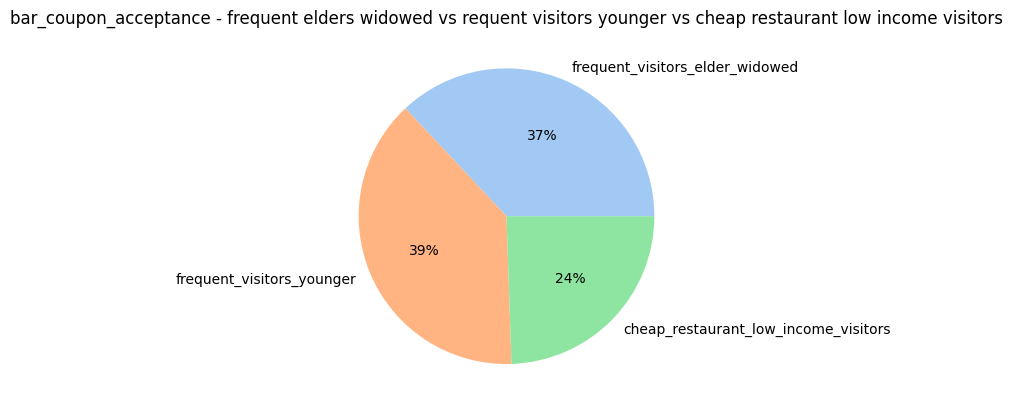

In [181]:
#define data
data = [proportion_of_bar_coupon_acceptance_frequent_visitors_elderly_age_not_widowed, proportion_of_bar_coupon_acceptance_frequent_visitors_younger_age, proportion_of_bar_coupon_acceptance_cheap_restaurant_low_income]
labels = ['frequent_visitors_elder_widowed', 'frequent_visitors_younger', 'cheap_restaurant_low_income_visitors']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:3]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('bar_coupon_acceptance - frequent elders widowed vs requent visitors younger vs cheap restaurant low income visitors')
plt.show()

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?


The 'more frequent visitors' to bar have accepted the coupons to the most (~76%) compared to the 'less frequent visitors' who have showed only less interest in coupon acceptance (~37%).

The 'frequent elderly visitors' to bar have accepted the coupons to the most (69%) compared to 'less frequent young visitors' who have showed only less interest (33%).

The 'frequent elderly visitors without farming/fishing/forestry job' to bar have accepted the coupons to the most (70%) compared to 'less frequent young visitors with farming/fishing/forestry job' who have showed only less interest (30%).

The 'frequent younger visitors' to bar have accepted the coupons to the most (39%) compared to 'frequent visitors that are elder and widowed' who have slightly less interest (37%) or 'frequent visitors to cheap restaurants with low income' who have even less interest (24%). ###


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [195]:
# Let's create a new dataframe that is filtered for coffee house coupon only

df_carryout_takeaway_coupons = df.query("coupon == 'Carry out & Take away'")

In [196]:
# Let's take a look at the top 5 rows for coffee house data frame

df_carryout_takeaway_coupons.head(5)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
33,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,1
41,Work,Alone,Sunny,80,7AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
47,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,46,Single,...,4~8,1~3,1~3,never,1,1,0,0,1,1
55,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,1,0,0,1,1


In [197]:
# Let's find the number of rows and columns available

df_carryout_takeaway_coupons.shape

(2280, 25)

In [198]:
# first calculate the CarryOut & takeaway coupon accepted count

carryout_takeaway_coupon_accepted = df_carryout_takeaway_coupons['Y'].value_counts()[1]

# calculate the total CarryOut & takeaway coupon offered count

total_carryout_takeaway_coupon_offered = df_carryout_takeaway_coupons['Y'].count()

# calculate the proportion of coffee coupon acceptance from above values

proportion_of_carryout_takeaway_acceptance = round((carryout_takeaway_coupon_accepted/total_carryout_takeaway_coupon_offered)*100,2)

print(f"\nProportion of carryout & takeaway acceptance : {proportion_of_carryout_takeaway_acceptance}")





Proportion of carryout & takeaway acceptance : 73.77


In [199]:
# Let's check the column data types once

df_carryout_takeaway_coupons.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2280 entries, 25 to 12680
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           2280 non-null   object
 1   passanger             2280 non-null   object
 2   weather               2280 non-null   object
 3   temperature           2280 non-null   int64 
 4   time                  2280 non-null   object
 5   coupon                2280 non-null   object
 6   expiration            2280 non-null   object
 7   gender                2280 non-null   object
 8   age                   2280 non-null   object
 9   maritalStatus         2280 non-null   object
 10  has_children          2280 non-null   int64 
 11  education             2280 non-null   object
 12  occupation            2280 non-null   object
 13  income                2280 non-null   object
 14  Bar                   2280 non-null   object
 15  CoffeeHouse           2280 non-null   obj

In [200]:
# Let's make a copy of the numeric column for acceptance and then convert into string for better use in charts

df_carryout_takeaway_coupons['acceptance'] = df_carryout_takeaway_coupons['Y']

df_carryout_takeaway_coupons['acceptance']=df_carryout_takeaway_coupons['acceptance'].astype("string")

In [201]:
# Let's validate if the column has been created with appropriate data type

print(df_carryout_takeaway_coupons.dtypes)

destination                     object
passanger                       object
weather                         object
temperature                      int64
time                            object
coupon                          object
expiration                      object
gender                          object
age                             object
maritalStatus                   object
has_children                     int64
education                       object
occupation                      object
income                          object
Bar                             object
CoffeeHouse                     object
CarryAway                       object
RestaurantLessThan20            object
Restaurant20To50                object
toCoupon_GEQ5min                 int64
toCoupon_GEQ15min                int64
toCoupon_GEQ25min                int64
direction_same                   int64
direction_opp                    int64
Y                                int64
acceptance              s

In [202]:
# For better readbaility, lets replace the value 1 as 'Accepted' & 0 as 'Not Accepted'

df_carryout_takeaway_coupons['acceptance'] = df_carryout_takeaway_coupons['acceptance'].str.replace('1', 'Accepted')
df_carryout_takeaway_coupons['acceptance'] = df_carryout_takeaway_coupons['acceptance'].str.replace('0', 'Not Accepted')

In [211]:
# Validate if the replaced values are showing up

df_carryout_takeaway_coupons['acceptance'].unique()

<StringArray>
['Not Accepted', 'Accepted']
Length: 2, dtype: string

Distribution of Coffee coupon acceptance¶

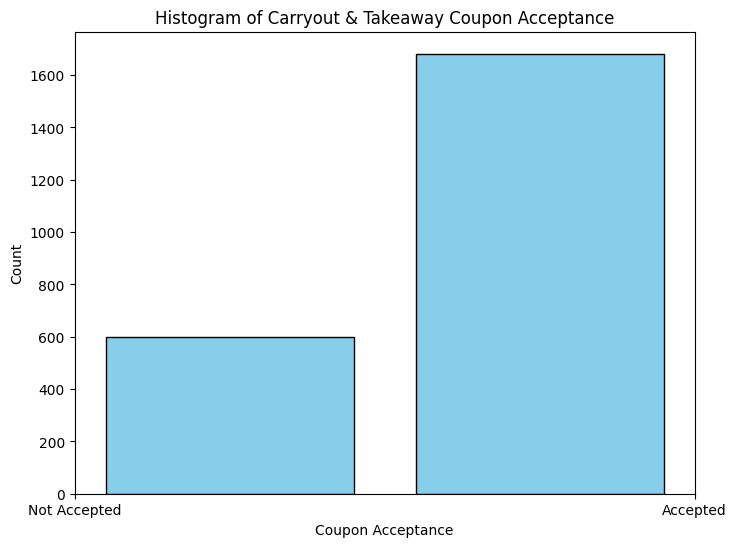

In [212]:
# create a histogram based on the carryout & takeway coupon acceptance overall

df_carryout_takeaway= df_carryout_takeaway_coupons[df_carryout_takeaway_coupons['coupon'] == 'Carry out & Take away']

# Plot a histogram of coupon acceptance
plt.figure(figsize=(8, 6))
plt.hist(df_carryout_takeaway['Y'], bins=2, color='skyblue', edgecolor='black', rwidth=0.8)
plt.xticks([0, 1], ['Not Accepted', 'Accepted'])
plt.title('Histogram of Carryout & Takeaway Coupon Acceptance')
plt.xlabel('Coupon Acceptance')
plt.ylabel('Count')
plt.show()

In [213]:
df_carryout_takeaway_coupons['passanger'].unique()

array(['Friend(s)', 'Alone', 'Kid(s)', 'Partner'], dtype=object)

In [214]:
# Filter the dataset for 'Carry out & Take away' coupons
df_carryout_takeaway = df_carryout_takeaway_coupons[df_carryout_takeaway_coupons['coupon'] == 'Carry out & Take away']

# Calculate the acceptance rate
acceptance_rate = df_carryout_takeaway['Y'].mean()

# Summarize key characteristics: age, gender, occupation, etc.
age_summary = df_carryout_takeaway['age'].value_counts()
gender_summary = df_carryout_takeaway['gender'].value_counts()
occupation_summary = df_carryout_takeaway['occupation'].value_counts()

# Prepare results
carryout_takeaway_findings = {
    "Acceptance Rate": acceptance_rate,
    "Age Distribution": age_summary,
    "Gender Distribution": gender_summary,
    "Occupation Distribution": occupation_summary
}

carryout_takeaway_findings

{'Acceptance Rate': np.float64(0.737719298245614),
 'Age Distribution': age
 21         466
 26         441
 31         370
 50plus     335
 36         239
 41         204
 46         121
 below21    104
 Name: count, dtype: int64,
 'Gender Distribution': gender
 Female    1176
 Male      1104
 Name: count, dtype: int64,
 'Occupation Distribution': occupation
 Unemployed                                   347
 Student                                      295
 Computer & Mathematical                      254
 Sales & Related                              198
 Education&Training&Library                   164
 Management                                   136
 Office & Administrative Support              118
 Arts Design Entertainment Sports & Media     101
 Business & Financial                          99
 Retired                                       84
 Food Preparation & Serving Related            58
 Healthcare Support                            48
 Community & Social Services          

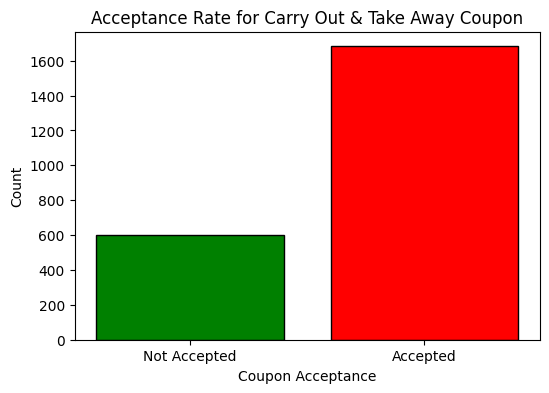

In [215]:
#Bar Plot for Coupon Acceptance Rate
# Filter for 'Carry out & Take away' coupons
df_carryout_takeaway = df_carryout_takeaway_coupons[df_carryout_takeaway_coupons['coupon'] == 'Carry out & Take away']

# Acceptance Rate
acceptance_counts = df_carryout_takeaway['Y'].value_counts()

# Plot
plt.figure(figsize=(6, 4))
plt.bar(acceptance_counts.index, acceptance_counts.values, color=['red', 'green'], edgecolor='black')
plt.xticks([0, 1], ['Not Accepted', 'Accepted'])
plt.title('Acceptance Rate for Carry Out & Take Away Coupon')
plt.xlabel('Coupon Acceptance')
plt.ylabel('Count')
plt.show()

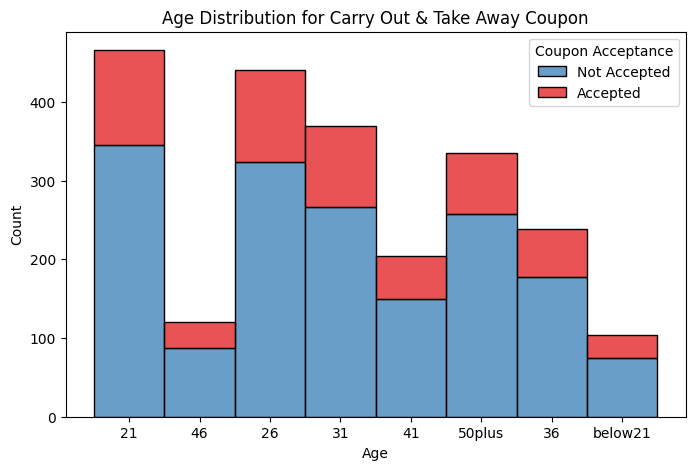

In [216]:
#Age Distribution
plt.figure(figsize=(8, 5))
sns.histplot(data=df_carryout_takeaway, x='age', hue='Y', multiple='stack', palette='Set1', bins=10)
plt.title('Age Distribution for Carry Out & Take Away Coupon')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Coupon Acceptance', labels=['Not Accepted', 'Accepted'])
plt.show()

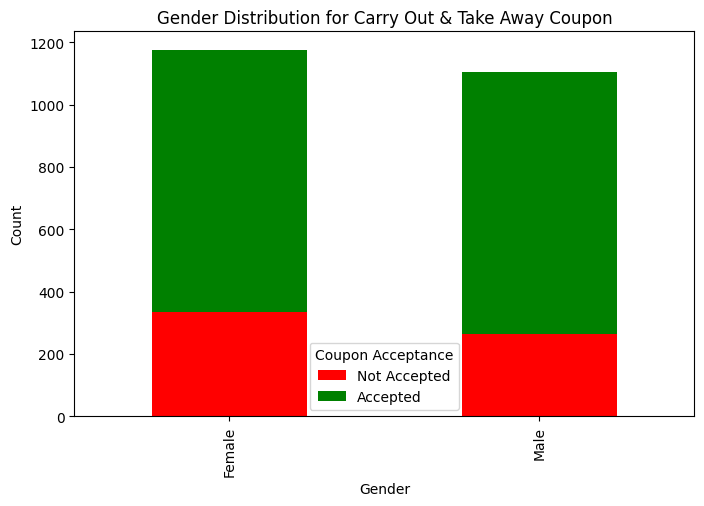

In [217]:
# Group by Gender and Acceptance
gender_acceptance = df_carryout_takeaway.groupby(['gender', 'Y']).size().unstack(fill_value=0)

# Plot Gender Distribution
gender_acceptance.plot(kind='bar', stacked=True, color=['red', 'green'], figsize=(8, 5))
plt.title('Gender Distribution for Carry Out & Take Away Coupon')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Coupon Acceptance', labels=['Not Accepted', 'Accepted'])
plt.show()


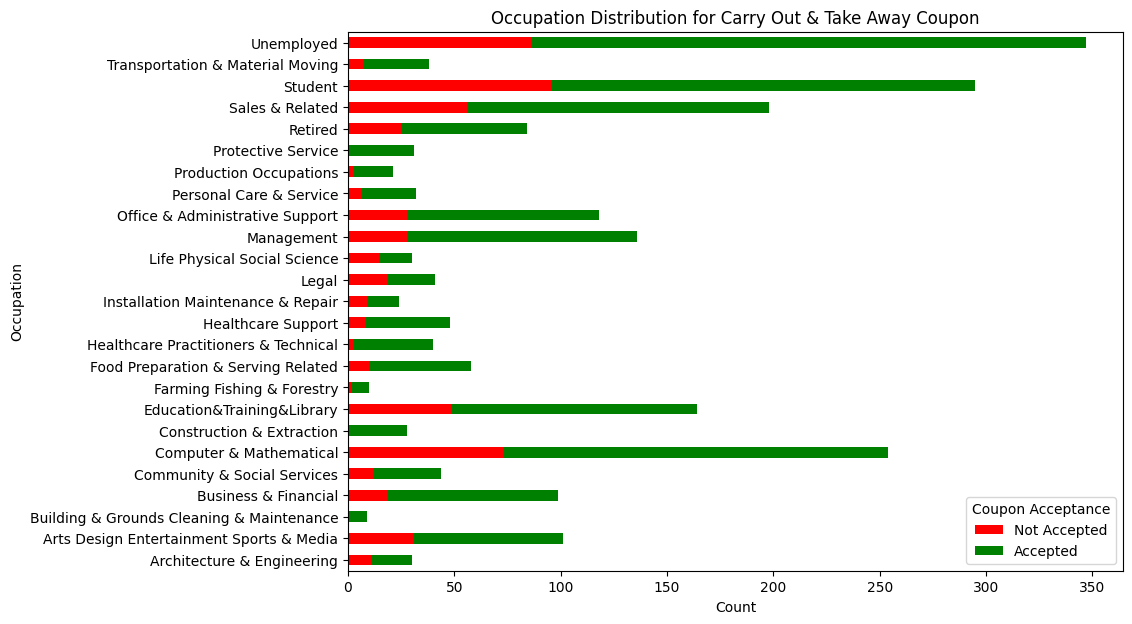

In [218]:
# Group by Occupation and Acceptance
occupation_acceptance = df_carryout_takeaway.groupby(['occupation', 'Y']).size().unstack(fill_value=0)

# Plot Occupation Distribution
occupation_acceptance.plot(kind='barh', stacked=True, color=['red', 'green'], figsize=(10, 7))
plt.title('Occupation Distribution for Carry Out & Take Away Coupon')
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.legend(title='Coupon Acceptance', labels=['Not Accepted', 'Accepted'])
plt.show()
